<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/datasets/insurance.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [3]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [5]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

<AxesSubplot:>

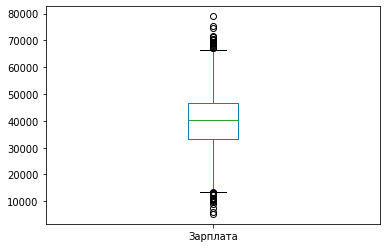

In [6]:
df['Зарплата'].plot(kind='box')

<AxesSubplot:>

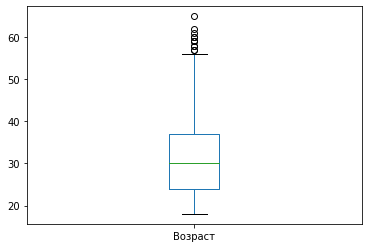

In [7]:
df['Возраст'].plot(kind='box')

<AxesSubplot:>

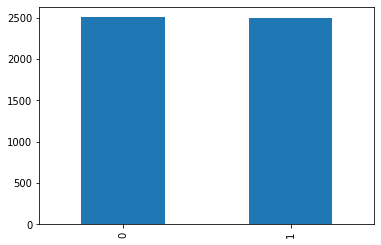

In [8]:
df['Пол'].value_counts().plot.bar()

<AxesSubplot:>

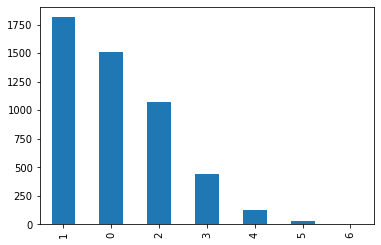

In [9]:
df['Члены семьи'].value_counts().plot.bar()

<AxesSubplot:>

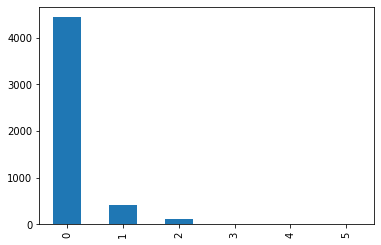

In [10]:
df['Страховые выплаты'].value_counts().plot.bar()

<AxesSubplot:>

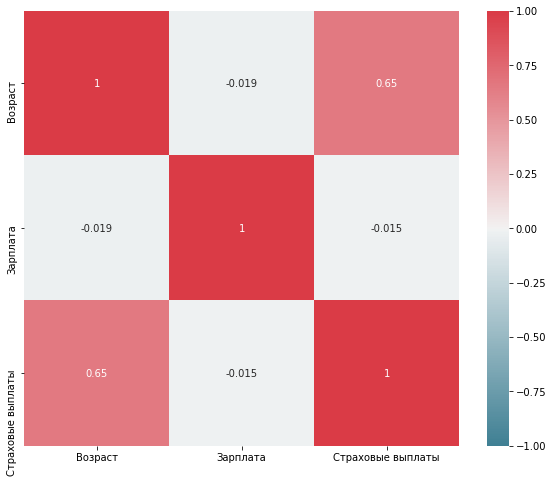

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df[['Возраст', 'Зарплата', 'Страховые выплаты']].corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0, annot=True,
    square=True, ax=ax)

### Выводы

Данные загружены, проведен анализ данных, преобразованны типы данных. Данные подготовлены к моделлированию.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** модели линейной регрессии не изменяться при перемножении матрицы признаков $X(M, N)$ на обратимую матрицу $P(N, M)$ 

**Обоснование:** 

Допустим что:

$ X^T X $- обратимая квадратная матрица и по определению матрица $P$ обратима

тогда используя следующие формулы:
$$
(A B)^T = A^T B^T
$$

$$
(A B)^{-1} = A^{-1} B^{-1} 
$$

$$
A^{-1} A = E
$$

Подставим $X P$ в формулы обучения:

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((X P)^T X P)^{-1} (X P)^T y
$$

$$
a = X P (P^T X^T X P)^{-1} P^T X^T y = X P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
= X (X^T X)^{-1} (P^{-1})^T P^T X^T y = X (X^T X)^{-1} (P P^{-1})^T X^T y 
$$


$$
 = X (X^T X)^{-1} X^T y = a
$$

### Выводы

С теоритеческой стороны домножение матрицы признаков на обратимую матрицу не повлияет на качество модели с алгоритмом линейной регрессии.

## Алгоритм преобразования

**Алгоритм**

* Разделение данных на матрицу признаков и вектор таргета 
* Создание матрицы P размерностью (4, 4)
* Создание обратной матрицы P
* Создание преобразованной матрицы признаков, с помощью умножения оригинальной матрицы на обратную матрицу P
* Создание модели на основе оригинальной матрицы признаков и ее оценка по метрике R2
* Создание модели на основе преобразованной матрицы признаков и ее оценка по метрике R2
* Сравнение метрик

**Обоснование**

Если метрики будут одинаковыми - это будет означать, что домножение матрицы признаков на обратимую матрицу не повлияет на качество модели с алгоритмом линейной регрессии.

### Выводы

Разработан алгоритм подтверждения теории о том что для защиты данных возможно домножить матрицу признаков на обратимую матрицу и это не повлияет на качество модели с алгоритмом линейной регрессии.

## Проверка алгоритма

Создадим обратимую матрицу

In [12]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

P = np.random.normal(size = (4,4))

display(P)

array([[ 0.03942465, -0.07488754,  0.66910756, -1.15215726],
       [ 0.2579871 ,  1.32715242, -1.40170544, -0.06213597],
       [-0.12211338, -0.4104478 , -0.21913409, -0.82470132],
       [-0.03891308, -0.14852594, -0.78816818,  0.32498045]])

In [13]:
reverse_P = np.linalg.inv(P)

display(reverse_P)

array([[ 12.56863971,  -1.03652391, -11.31082181,  15.65815535],
       [ -2.75251618,   0.76767732,   2.09884353,  -4.28552577],
       [ -0.27428975,  -0.16920459,  -0.06957584,  -1.1813569 ],
       [ -0.4182467 ,  -0.18362956,  -0.56386063,   0.12827669]])

Посмотрим как выглядит преобразованная матрица признаков

In [14]:
reverse_features = features @ P
display(reverse_features)

,0,1,2,3
0,-6046.245596,-20304.021146,-10926.640078,-40908.560337
1,-4628.479894,-15536.115993,-8392.362215,-31341.183521
2,-2556.899325,-8580.916423,-4642.465445,-17320.529711
3,-5086.787985,-17088.100197,-9168.903898,-34390.700034
4,-3179.896118,-10675.602253,-5757.978515,-21527.596476
...,...,...,...,...
4995,-4352.301804,-14616.123317,-7863.911268,-29442.927052
4996,-6390.008391,-21462.490171,-11531.072713,-43216.136930
4997,-4134.561619,-13887.934493,-7458.256254,-27957.967584
4998,-3987.509079,-13392.966239,-7198.217812,-26969.277446


Понять возраст, зарплату по таким данным невозможно. Проверим как выглядит восстановленная матрица признаков.

In [15]:
recovery_features = reverse_features @ reverse_P
display(recovery_features.head())

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,7.277844e-12,46.0,38000.0,1.000000e+00
2,1.210578e-12,29.0,21000.0,-4.309707e-12
3,8.018021e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,5.618461e-12


In [16]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
metric1 = r2_score(target, predictions)
print('Метрика качества линейной регрессии R2 на исходных признаках:', metric1)

Метрика качества линейной регрессии R2 на исходных признаках: 0.42494550308169177


In [17]:
model = LinearRegression()
model.fit(reverse_features, target)
predictions = model.predict(reverse_features)
metric = r2_score(target, predictions)
print('Метрика качества линейной регрессии R2 на исходных признаках с домножением на обратимую матрицу:', metric)

Метрика качества линейной регрессии R2 на исходных признаках с домножением на обратимую матрицу: 0.4249455030816881


In [18]:
print('Отклонение метрики линейной регрессии непреобразованной матрицы от преобразованной', (metric - metric1)/metric1)

Отклонение метрики линейной регрессии непреобразованной матрицы от преобразованной -8.621660788721649e-15


### Выводы

Для шифрования данных теоритически доказан алгоритм преобразования матрицы признаков. Алгоритм был смоделлирован на реальных данных, полученны значения метрик R2 для преобразованных и не преобразованных данных. 

Отклонение составило -8.621660788721649e-15. 

Данное отклонение подтверждает теоретический алгоритм для шифрования данных.